In [1]:
import textblob
import pandas as pd
import numpy as np
from textblob_de import TextBlobDE
import matplotlib.pyplot as plt

In [3]:
 %matplotlib inline

In [4]:

df = pd.read_csv("Klinikbewertungen.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3032 entries, 0 to 3031
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Klinikname                           3032 non-null   object
 1   Nutzername                           3032 non-null   object
 2   Titel                                3032 non-null   object
 3   Datum                                3032 non-null   object
 4   Behandlungsjahr                      3032 non-null   object
 5   Berichtet als                        3032 non-null   object
 6   Daumen hoch/runter                   3032 non-null   object
 7   Fachbereich                          3032 non-null   object
 8   Gesamtzufriedenheit                  3032 non-null   int64 
 9   Textuell Gesamtzufriedenheit         3032 non-null   object
 10  Beratungsqualität                    3032 non-null   int64 
 11  Textuell Beratungsqualität           3032 n

Klinikname                         Gesamtzufriedenheit
AMEOS Klinikum Osnabrück           0                      57.01
                                   6                      22.43
                                   2                      14.02
                                   4                       6.54
Aller-Weser-Klinik - Klinik Achim  6                      53.12
                                                          ...  
Psychiatrische Klinik Uelzen       4                      11.11
Städtische Kliniken Osnabrück      6                      47.37
                                   0                      25.44
                                   2                      14.04
                                   4                      13.16
Name: Gesamtzufriedenheit, Length: 81, dtype: float64


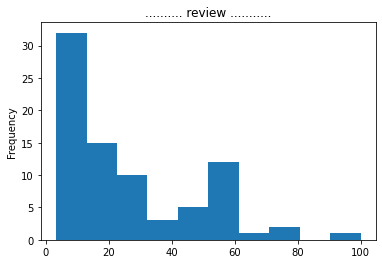

In [13]:

from textblob_de import PatternParser


print(round(df.groupby('Klinikname').Gesamtzufriedenheit.value_counts(normalize=True)*100,2))
round(df.groupby('Klinikname').Gesamtzufriedenheit.value_counts(normalize=True)*100,2).plot(kind='hist')
plt.title('.......... review ...........')
plt.show()

# Train Data 

In [7]:
from sklearn.model_selection import train_test_split

ErfarungBericht = df.Erfahrungsbericht
ZUfrieden = df.Gesamtzufriedenheit

EB_train, Z_test, EB_train, Z_test = train_test_split(ErfarungBericht, ZUfrieden, test_size = 0.2, random_state = 225)



In [ ]:

# train_x = negative[:1500] 
# train_y = positive[:1000] 
 
# test_x = negative[:317] 
# test_y = positive[:210] 
# print (len(test_y), 
#        len(test_x), 
#        len(train_y), 
#        len(train_x))

In [8]:
print('EB_train :', len(EB_train))
print('Z_test  :', len(Z_test))
print('EB_train :', len(EB_train))
print('Z_test  :', len(Z_test))

EB_train : 2425
Z_test  : 607
EB_train : 2425
Z_test  : 607


In [12]:
EB_train[8]

0

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [10]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

NameError: name 'IV_train' is not defined

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

In [18]:
example = ["Augenscheinlich braucht diese Klinik in Corona-Zeiten Geld und tut alles, um dieses von den Krankenkassen zu bekommen!Patientin war meine 3 Monate alte Tochter. Es handelte sich um eine geplante Operation, die durchaus auch als ambulante OP vorgenommen wird. Den Grund, warum die stationäre Aufnahme notwendig war, konnte mir niemand erläutern!Bei der vorstationären Aufnahme wurde ich daraufhingewiesen, dass ich Windeln und Nahrung für mein Kind selbst mitzubringen hätte. Das Nahrung mitzubringen ist, konnte ich nachvollziehen, da es hier sehr viele verschiedene Angebote gibt und die Klinik unmöglich alle Sorten vorhalten kann! Aber Windeln? Das ist für eine Klinik mit Kinderorthopädie als Fachrichtung nicht nachvollziehbar!Das Zimmer war ein normales Doppelzimmer mit einem Gitterbettchen für meine Tochter und einem Krankenbett für mich. Im Zimmer gab es weder einen Wickelplatz noch Feuchttücher bzw. einen Windeleimer o. Ä. Wickelzubehör!Mehrere Ärzte bzw. Schwestern kannten, trotz Krankenakte in ihren Händen, nicht einmal das Geschlecht meiner Tochter.Nach der OP übten sich die Schwestern auf der Station in vornehmer Zurückhaltung! Niemand interessierte sich für den Gesundheitszustand meiner Tochter! Die verordneten Schmerzmittel wurden 1,5 Stunden zu spät gebracht und interessiert, ob ich diese meiner Tochter gebe oder nicht hat es niemanden!Am Entlassungstag sprachen die meist sehr unfreundlichen Stationsschwestern von einem Verbandswechsel, der absolut nicht notwendig und für die Behandlung meiner Tochter auch nicht vorgesehen war.Die Entlassungspapiere und der Arztbrief für den behandelnden Orthopäden wurden vor der Entlassungsvisite fertig gemacht, obwohl im Arztbrief das Ergebnis der Entlassungsvisite steht! Scheinbar kann in der Klinik jemand hellsehen."]
result = model.predict(example)

print(result)

[6]
